#Imports


In [ ]:
!pip install py-tsdata
!pip install statsmodels==0.12.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import scipy
from scipy import stats
from tsdata.raw import available_data, load_data
import ipywidgets as widgets
from IPython.display import display
from pylab import rcParams
import warnings 
from google.colab import files
import cv2
rcParams['figure.figsize'] = 13, 6
warnings.filterwarnings('ignore')


##list of data

In [ ]:
available_data()

['LakeHuron',
 'PBS',
 'ansett',
 'aus_accommodation',
 'aus_airpassengers',
 'aus_arrivals',
 'aus_livestock',
 'aus_production',
 'aus_retail',
 'bank_calls',
 'boston_marathon',
 'canadian_gas',
 'gafa_stock',
 'global_economy',
 'guinea_rice',
 'hh_budget',
 'insurance',
 'nyc_bikes',
 'olympic_running',
 'pedestrian',
 'pelt',
 'prices',
 'prison',
 'souvenirs',
 'tourism',
 'tute1',
 'us_change',
 'us_employment',
 'us_gas_total',
 'us_gasoline',
 'vic_elec']

# Functions
Some functions for using in this section

In [ ]:
# Function for creating lineplot
def lineplot(dataframe, x, y, hue=None, title='Time', width=10, highth=6, palette=None):
    plt.figure(figsize=(width, highth))
    sns.lineplot(data=dataframe, x=x, y=y, hue=hue, palette=palette)
    plt.title(f'{title} series')
    plt.grid()

In [ ]:
# Function for basic time series plot
def plot(series, title='Time', width=8, highth=4):
  plt.figure(figsize=(width, highth))
  plt.plot(series)
  plt.title(f'Visualization for {title} series')
  plt.grid()

# Ex 1
Consider the GDP information in global_economy. Plot the GDP per capita for each country over time. Which country has the highest GDP per capita? How has this changed over time?

In [ ]:
#Reading the data
df1 = load_data("global_economy")
df1.head()

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


To be able to plot GDP per capita it was added as new feature. And as we have a lot of countries here I removed legend for now just to see how much countries with close to max GDP per capita we have.

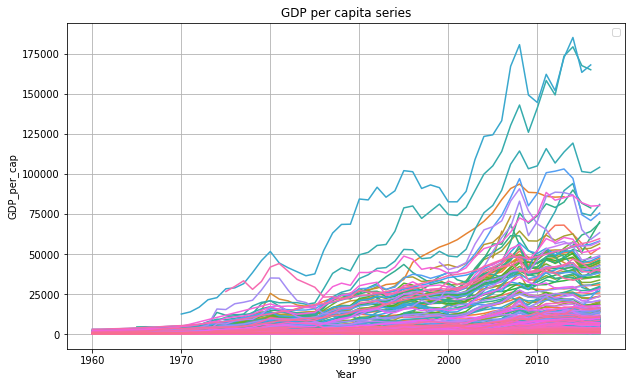

In [ ]:
# Added GDP per capita and plotting it with respect to country
df1['GDP_per_cap']=df1.GDP/df1.Population
lineplot(df1, 'Year', 'GDP_per_cap', 'Country', title='GDP per capita')
plt.legend('');

As we can see there are few leader and last 2 countries have the highest GDP per capita, let's check what are they.

In [ ]:
# Finding the country with the highest GDP per capita over all years
df1.loc[df1.GDP_per_cap == df1.GDP_per_cap.max()]['Country']

9502    Monaco
Name: Country, dtype: object

In [ ]:
# Separating records with 100 largest GDP per capita and creating table for them
max_100 = df1['GDP_per_cap'].nlargest(100)
new = df1["GDP_per_cap"].isin(max_100)
df1_max = df1[new]

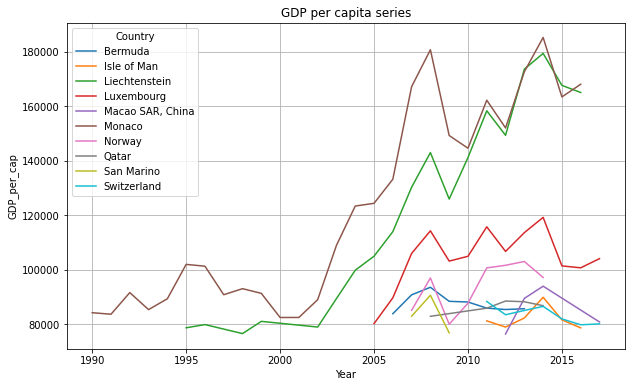

In [ ]:
# Plotting the 100 highest values with respect to country
lineplot(df1_max, 'Year', 'GDP_per_cap', 'Country', title='GDP per capita')

* Now legend is smaller and we can clearly see that countries with the biggest GDP per capita in last 10 years are Monaco and Liechtenstein. 
* Monaco had the highest GDP all the time(can be also confirmed on previous graph), it has some periods of growing and decreasing but general trend is growing, the same for Liechtenstein espessially after 2003. 
* On third place we have Luxemburg which doesn't have such close results but still GDP is very high. 
* Those countries all are small and economically stable, so results are not surprising.

# Ex 2
For each of the following series, make a graph of the data. If transforming seems appropriate, do so and describe the effect.

##2.1 
United States GDP from global_economy.

In [ ]:
# Filtering the data used in previous tasks by United States as a country
df2_1 = df1[df1.Country == 'United States']
df2_1.head()

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,GDP_per_cap
14426,United States,USA,1960,5.433000e+11,NaN,13.563061,4.196576,4.969630,180671000.0,3007.123445
14427,United States,USA,1961,5.633000e+11,2.3,13.708284,4.029824,4.899698,183691000.0,3066.562869
14428,United States,USA,1962,6.051000e+11,6.1,13.872615,4.131549,4.809122,186538000.0,3243.843078
14429,United States,USA,1963,6.386000e+11,4.4,14.044590,4.087065,4.870028,189242000.0,3374.515171
14430,United States,USA,1964,6.858000e+11,5.8,14.224207,4.097404,5.103529,191889000.0,3573.941185


In [ ]:
# Setting year as index
df2_1.set_index('Year', inplace=True)

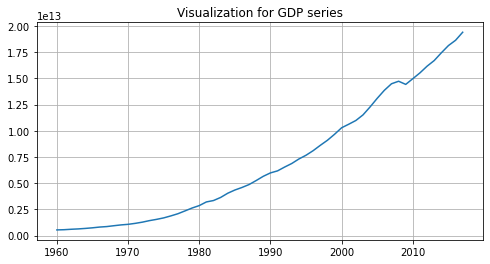

In [ ]:
# Visualization for the GDP series
plot(df2_1.GDP, 'GDP')

For this series Population adjustments is appropriate but it was already done in the first task, so just will plot GDP per capita

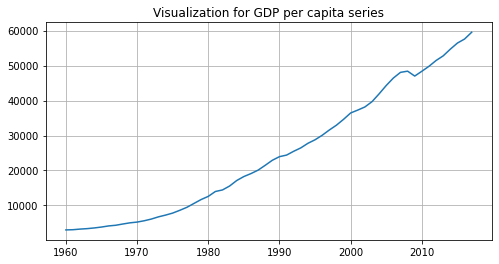

In [ ]:
# Visualization for the series
plot(df2_1.GDP_per_cap, 'GDP per capita')

After this population adjustments no essential changes observed, probably because with increasing population GDP also increases.

In the book also Inflation adjustments is described, it is good for some data with cost, but I've tried it here as well, because it also can affect GDP.

In [ ]:
# Creating new feature with adjusted by CPI GDP per capita 
df2_1['Adjusted_GDP'] = df2_1.GDP_per_cap/df2_1.CPI*100

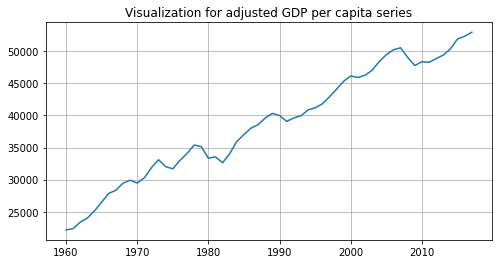

In [ ]:
# Visualization for adjusted GDp per capita
plot(df2_1.Adjusted_GDP, 'adjusted GDP per capita')

Here upgoing trend didn't change but variation become bigger, so I assume CPI adjustment is obsolete, GDP per capita was enough. But if we need to extract cycle then adjusted with CPI data will show them better.

##2.2
Slaughter of Victorian “Bulls, bullocks and steers” in aus_livestock.

In [ ]:
# Filtering the data
df2_2 = load_data("aus_livestock")
df2_2.query('Animal == "Bulls, bullocks and steers" and State == "Victoria"', inplace=True)
df2_2.head()

,Month,Animal,State,Count
3036,1976 Jul,"Bulls, bullocks and steers",Victoria,109200.0
3037,1976 Aug,"Bulls, bullocks and steers",Victoria,94700.0
3038,1976 Sep,"Bulls, bullocks and steers",Victoria,95500.0
3039,1976 Oct,"Bulls, bullocks and steers",Victoria,94800.0
3040,1976 Nov,"Bulls, bullocks and steers",Victoria,94100.0


In [ ]:
# Setting year and month as index
df2_2.Month = pd.to_datetime(df2_2.Month, format='%Y %b')
df2_2.set_index('Month', inplace=True)

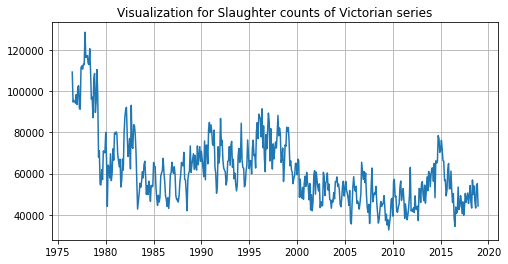

In [ ]:
# Visualization for the series
plot(df2_2.Count, 'Slaughter counts of Victorian')

* As this data has variation that is different and we don't see increases or decreases with the level of the series, mathematical transformation isn't useful. To confirm this visualization of transformed data was checked.
* Also from other types of transformation the only one thing is calendar adjustment, because data is monthly and different months have different amount of days. But still the difference is too small to change series enough. Looks like there are seasonal peaks in the middle of every years, so inspection of seasonal component will give better result.

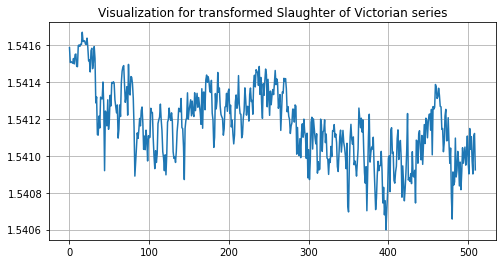

In [ ]:
# Visualization for transformed data for confirming described assumption
fitted_data, fitted_lambda = stats.boxcox(df2_2.Count)
plot(fitted_data, 'transformed Slaughter of Victorian')

##2.3
Victorian Electricity Demand from vic_elec

In [ ]:
# Reading the data
df2_3 = load_data("vic_elec")
df2_3.head()

,Time,Demand,Temperature,Date,Holiday
0,2011-12-31T13:00:00Z,4382.825174,21.40,2012-01-01,True
1,2011-12-31T13:30:00Z,4263.365526,21.05,2012-01-01,True
2,2011-12-31T14:00:00Z,4048.966046,20.70,2012-01-01,True
3,2011-12-31T14:30:00Z,3877.563330,20.55,2012-01-01,True
4,2011-12-31T15:00:00Z,4036.229746,20.40,2012-01-01,True


In [ ]:
# Transforming and setting Time date as index
df2_3.Time = pd.to_datetime(df2_3.Time, format='%Y-%m-%dT%H:%M')
df2_3.set_index('Time', inplace=True)

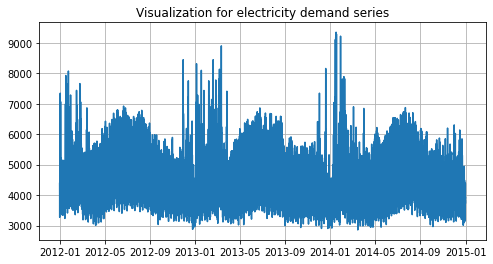

In [ ]:
# Visualization for the series
plot(df2_3.Demand, 'electricity demand')

For this data as well no transformation will be usefull, as variation magnitude is not constantly increasing, it is seasonal with 1 high peak in January and 1 smaller peak in summer

##2.4
Gas production from aus_production

In [ ]:
# Reading the data
df2_4 = load_data("aus_production")
df2_4.head()

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956 Q1,284,5225.0,189.0,465,3923,5
1,1956 Q2,213,5178.0,204.0,532,4436,6
2,1956 Q3,227,5297.0,208.0,561,4806,7
3,1956 Q4,308,5681.0,197.0,570,4418,6
4,1957 Q1,262,5577.0,187.0,529,4339,5


To transform the date from such format first it was splitted on years and quarters, and after that string quarters were replaced with month numbers.

In [ ]:
# Splitting years and quarters into separate lists
years = []
quarters = []
for i in df2_4.Quarter:
  splitted_list = i.split()
  years.append(splitted_list[0])
  quarters.append(splitted_list[1])
  splitted_list = []

df2_4['quarter'] = quarters
df2_4['year'] = years

vals_to_replace = {'Q1':'-03', 'Q2':'-06', 'Q3':'-09', 'Q4':'-12'} # replacing quarter string with corresponding month
df2_4.quarter = df2_4.quarter.map(vals_to_replace)

In [ ]:
# Creating date index with year and quartely month
df2_4['date'] = df2_4.year+df2_4.quarter
df2_4.set_index('date', inplace=True)
df2_4.index = pd.DatetimeIndex(df2_4.index)

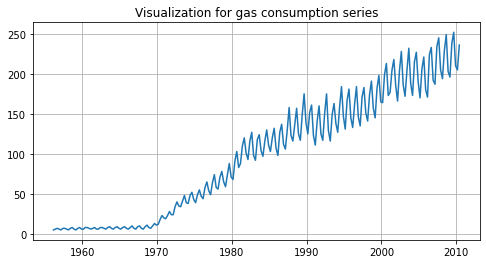

In [ ]:
# Visualization for the series
plot(df2_4.Gas, 'gas consumption')

Box-Cox transformation will be useful here because gas consumption data shows variation that increases with the level of the series.

In [ ]:
# Default statsmodels box-cox transformation
fitted_data, fitted_lambda = stats.boxcox(df2_4.Gas)
fitted_lambda

0.4374315279941498

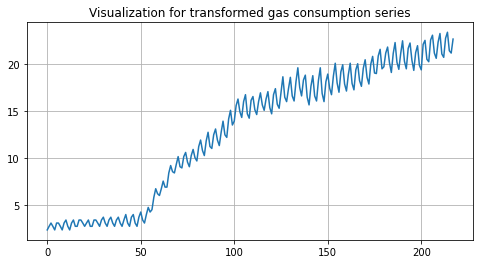

In [ ]:
# Visualization for the transformed series
plot(fitted_data, 'transformed gas consumption')

Lambda here is 0.48 and series looks much better, variation become more constant, but let's try some other value.

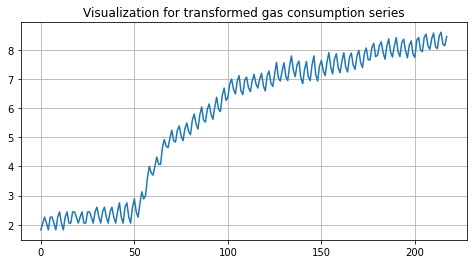

In [ ]:
# Customized lambda in Box-Cox transformation
fitted_data = stats.boxcox(df2_4.Gas, lmbda=0.15)
plot(fitted_data, 'transformed gas consumption')

This one result is very good, variation is smaller and more constant, the pattern become more consistent across the whole data set

# Ex 3
Why is a Box-Cox transformation unhelpful for the canadian_gas data?

In [ ]:
# Reading the data
df3 = load_data("canadian_gas")
df3.head()

,Month,Volume
0,1960 Jan,1.4306
1,1960 Feb,1.3059
2,1960 Mar,1.4022
3,1960 Apr,1.1699
4,1960 May,1.1161


In [ ]:
# Setting date index
df3.Month = pd.to_datetime(df3.Month, format='%Y %b')
df3.set_index('Month', inplace=True)

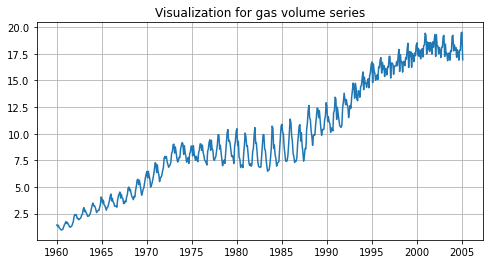

In [ ]:
# Visualization for the series
plot(df3.Volume, 'gas volume')

As we can see from the plot variation is not increasing or decreasing all the time with level of the series. Fierst variation increases, but later decreases with increasing freaquency in seasonality. So transformation will not do better for this data. Let's check it by plotting transformed data.

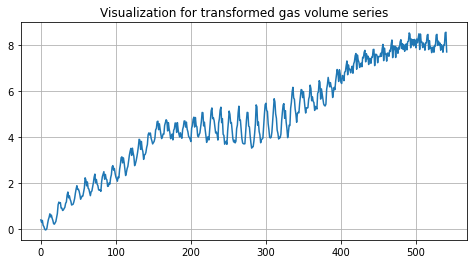

In [ ]:
# Transforming and plotting the series
fitted_data, fitted_lambda = stats.boxcox(df3.Volume)
plot(fitted_data, 'transformed gas volume')

As we can see nothing was improved, so we can confirm previous statement.

# Ex 4
What Box-Cox transformation would you select for your retail data (from Exercise 8 in Section 2.10)?

In [ ]:
# Filtering the data for one series ID
df4 = load_data('aus_retail')
df4 = df4[df4['Series ID'] == 'A3349849A']
df4.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Apr,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 May,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jun,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jul,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Aug,3.6


In [ ]:
# Setting index as year and month
df4.Month = pd.to_datetime(df4.Month, format='%Y %b')
df4.set_index('Month', inplace=True)

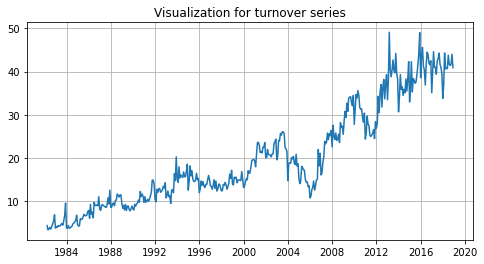

In [ ]:
# Visualization for the series
plot(df4.Turnover, 'turnover')

* As we can see data has some kind of increasing variance with time, so Box-Cox transformation can help. 
* In the task it is written about Box-Cox only but also I was thinking about calendar and inflation adjustments. But for inflation there is no CPI value in the table and I'm not sure if I can take it from other tables. Calendar adjustment would help I think because every month have slightly different amount of traiding days, but I don't have the information about them in Australia.
* I was experimenting with lambda value and -0.5 gave me pretty good result which was plotted below.

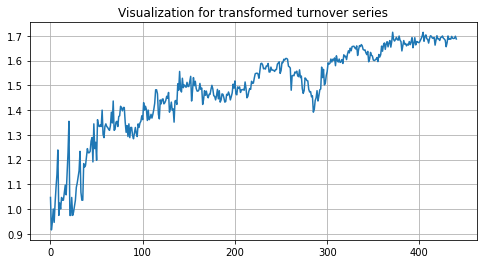

In [ ]:
# Visualization for transformed series
fitted_data = stats.boxcox(df4.Turnover, lmbda=-0.5)
plot(fitted_data, 'transformed turnover')

Cann't say that result is very good but at least in some parts variation become smaller and more constant.

#Ex 5
For the following series, find an appropriate Box-Cox transformation in order to stabilise the variance. 

##5.1
Tobacco from aus_production

In [ ]:
# Reading the data
df5_1 = df2_4.copy()
df5_1.head()

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas,quarter,year
date,,,,,,,,,
1956-03-01,1956 Q1,284,5225.0,189.0,465,3923,5,-03,1956
1956-06-01,1956 Q2,213,5178.0,204.0,532,4436,6,-06,1956
1956-09-01,1956 Q3,227,5297.0,208.0,561,4806,7,-09,1956
1956-12-01,1956 Q4,308,5681.0,197.0,570,4418,6,-12,1956
1957-03-01,1957 Q1,262,5577.0,187.0,529,4339,5,-03,1957


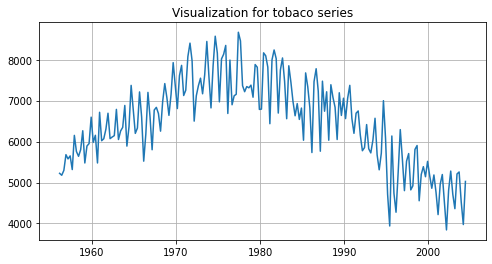

In [ ]:
# Visualization for the series
plot(df5_1.Tobacco, 'tobaco')

First I've tried lambda value which is returned by boxcox method as optimal, but the result wasn't really good

lambda= 8.472135811722177


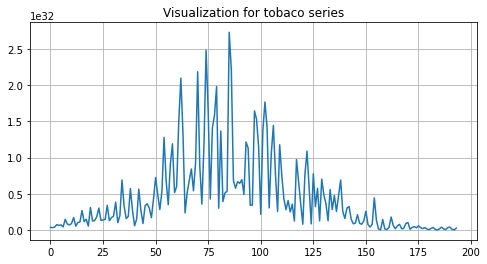

In [ ]:
# Basic Box-Cox transformation and visualising the data after it
fitted_data, fitted_lambda = stats.boxcox(df5_1.Tobacco)
plot(fitted_data, 'tobaco')
print(f'lambda= {fitted_lambda}')

Result is not good, variance isn't constant after transformation.

Now let's check transformations with other lambda values.

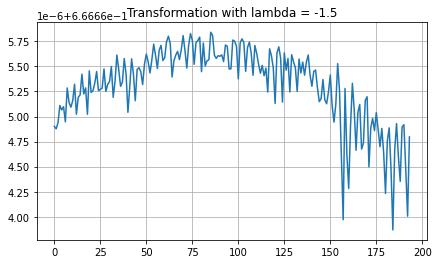

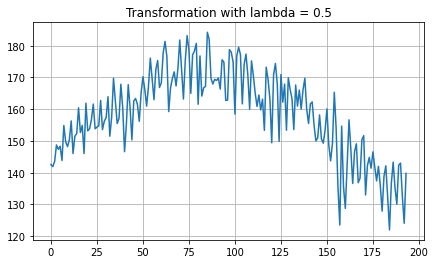

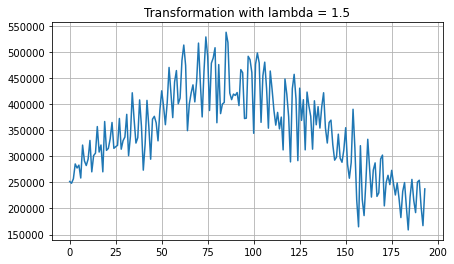

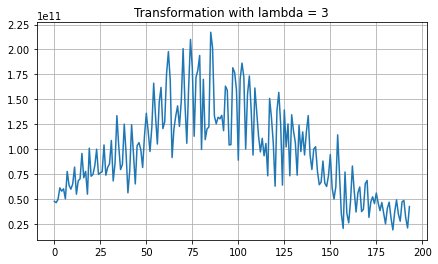

In [ ]:
# Loop with plots through list of few lambda values
lambdas = [-1.5, 0.5, 1.5, 3]
for i in lambdas:  
  fitted_data = stats.boxcox(df5_1.Tobacco, lmbda=i)
  plot(fitted_data, 'tobaco ', 7, 4)
  plt.title(f'Transformation with lambda = {i}')

I think that for Tobaco series more optimal transformation is with lambda=0.5 as it gives a little bit more constant variance then initial data. But still no value give some really good result.

##5.2
Economy class passengers between Melbourne and Sydney from ansett

In [ ]:
# Reading the data
df5_2 = load_data('ansett')
df5_2.head()

,Week,Airports,Class,Passengers
0,1989 W28,ADL-PER,Business,193
1,1989 W29,ADL-PER,Business,254
2,1989 W30,ADL-PER,Business,185
3,1989 W31,ADL-PER,Business,254
4,1989 W32,ADL-PER,Business,191


In [ ]:
# Filtering the data
df5_2.query('Airports=="MEL-SYD" and Class=="Economy"', inplace=True)

In [ ]:
# Splitting Week feature into years and weeks lists
years = []
weeks = []
for i in df5_2.Week:
  splitted_list = i.split(' W')
  years.append(splitted_list[0])
  weeks.append(splitted_list[1]+'0')
  splitted_list = []

# Forming datetime index from year and week
df5_2['week'] = weeks
df5_2['year'] = years
df5_2['date']=df5_2['year']+df5_2['week']
df5_2.date = pd.to_datetime(df5_2.date, format='%Y%W%w')
df5_2.set_index('date', inplace=True)

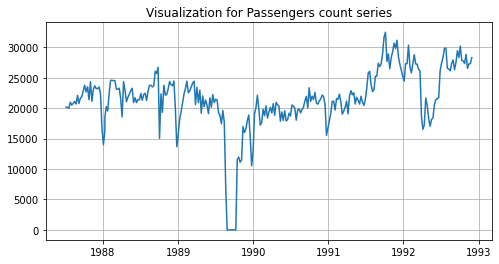

In [ ]:
# Visualization for the series
plot(df5_2.Passengers, 'Passengers count')

As we can see for this data we have zero values which means that Box-Cox transformation can't be applied. I'm not sure if those zero values are missing values type and can be imputed, or there was really no passengers for some dates. 

To be albe at least to try transformation I've changed zeros to 0.1

In [ ]:
df5_2.Passengers.replace(0, 0.1, inplace=True)

1.1665027653617812

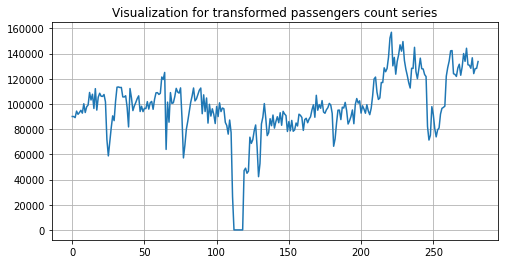

In [ ]:
# Basic Box-Cox transformation and visualising the data after it
fitted_data, fitted_lambda = stats.boxcox(df5_2.Passengers)
plot(fitted_data, 'transformed passengers count')
fitted_lambda

Transformation didn't change anything.

Now let's check transformations with other lambda values.

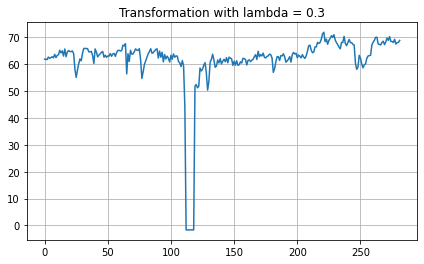

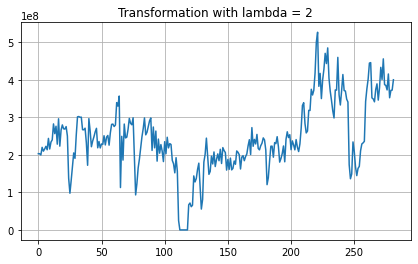

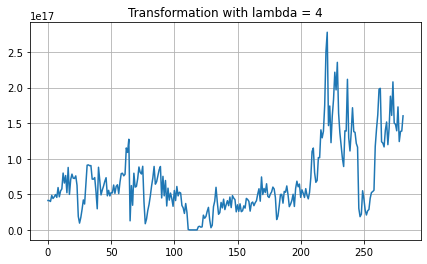

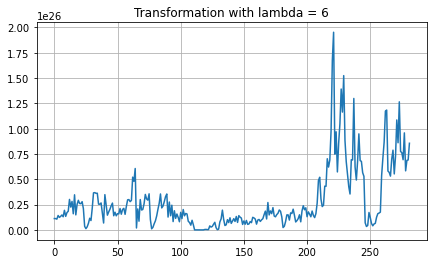

In [ ]:
# Loop with plots through list of few lambda values
lambdas = [0.3, 2, 4, 6]
for i in lambdas:  
  fitted_data = stats.boxcox(df5_2.Passengers, lmbda=i)
  plot(fitted_data, 'Transformed ', 7, 4)
  plt.title(f'Transformation with lambda = {i}')

* No lambda value gave us good result, variance is still very non-constant
* With value 0.3 transformation gave bad result only for zero values, so I maybe if to fix zeros as missing values with some historical values then result could be good.

##5.3
Pedestrian counts at Southern Cross Station from pedestrian

In [ ]:
# Reading the data
df5_3 = load_data('pedestrian')
df5_3.head()

,Sensor,Date_Time,Date,Time,Count
0,Birrarung Marr,2014-12-31T13:00:00Z,2015-01-01,0,1630
1,Birrarung Marr,2014-12-31T14:00:00Z,2015-01-01,1,826
2,Birrarung Marr,2014-12-31T15:00:00Z,2015-01-01,2,567
3,Birrarung Marr,2014-12-31T16:00:00Z,2015-01-01,3,264
4,Birrarung Marr,2014-12-31T17:00:00Z,2015-01-01,4,139


In [ ]:
# Filtering the data and setting datetime index
df5_3.query('Sensor=="Southern Cross Station"', inplace=True)
df5_3.Date_Time = pd.to_datetime(df5_3.Date_Time, format='%Y-%m-%dT%H:%M')
df5_3.set_index('Date_Time', inplace=True)

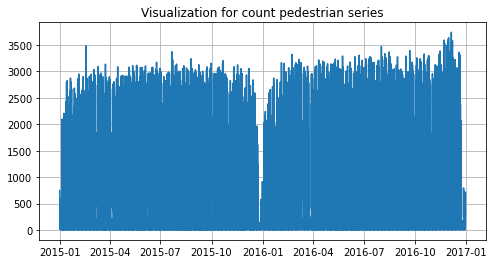

In [ ]:
# Visualization for the series
plot(df5_3.Count, 'count pedestrian')

Here we also have zeros and I've changed them to 1 as it is very close in terms of pedestrian counts.

0.10770611612574216

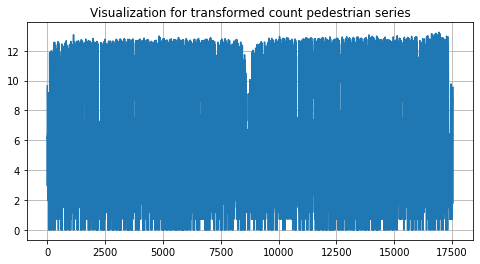

In [ ]:
# Basic Box-Cox transformation and visualising the data after it
df5_3.Count.replace(0, 1, inplace=True)
fitted_data, fitted_lambda = stats.boxcox(df5_3.Count)
plot(fitted_data, 'transformed count pedestrian')
fitted_lambda

Actually I'm not sure in estimating this result because from one point of vew on graph variance become more constant which is good, no big peaks on the right and left sides. But places with small values still have smaller variance.

Other lambda values gave me worse results so I left this one as optimal.

# Ex 6
Show that a 3 × 5 MA is equivalent to a 7-term weighted moving average with weights of 0.067, 0.133, 0.200, 0.200, 0.200, 0.133, and 0.067.

Following mathematical transformations are showing that 3x5MA is equal to 7MA.

$ 3 × 5 MA =$
$\frac{1}{3}[\frac{1}{5}(x_{t-3} + x_{t-2} + x_{t-1} + x_t + x_{t+1}) + \frac{1}{5}(x_{t-2} + x_{t-1} + x_t + x_{t+1} + x_{t+2}) + \frac{1}{5}(x_{t-1} + x_{t} + x_{t+1} + x_{t+2} + x_{t+3})]$

$= \frac{1}{15}x_{t-3} + \frac{2}{15}x_{t-2} + \frac{1}{5}x_{t-1} + \frac{1}{5}x_t + \frac{1}{5}x_{t+1} + \frac{2}{15}x_{t+2} + \frac{1}{15}x_{t+3}$

$= 0.067x_{t-3} + 0.133x_{t-2} + 0.200x_{t-1} + 0.200x_t + 0.200x_{t+1} + 0133x_{t+2} + 0.067x_{t+3} = 7MA$

# Ex 7
Consider the last five years of the Gas data from aus_production

In [ ]:
# Filtering the data by last 5 years
df7 = df2_4[df2_4.index.year>=2005]
df7.tail()

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas,quarter,year
date,,,,,,,,,
2009-06-01,2009 Q2,398,NaN,NaN,2160,57471,238,-06,2009
2009-09-01,2009 Q3,419,NaN,NaN,2325,58394,252,-09,2009
2009-12-01,2009 Q4,488,NaN,NaN,2273,57336,210,-12,2009
2010-03-01,2010 Q1,414,NaN,NaN,1904,58309,205,-03,2010
2010-06-01,2010 Q2,374,NaN,NaN,2401,58041,236,-06,2010


##a
Plot the time series. Can you identify seasonal fluctuations and/or a trend-cycle?

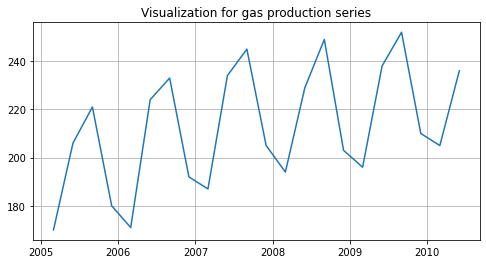

In [ ]:
# Visualization for the series
plot(df7.Gas, 'gas production')

Yes, on the plot we can see linearly increasing trend and yearly seasonality, in the beginning of the years there are troughs and in the middle peaks.

##b
Use classical_decomposition with type=multiplicative to calculate the trend-cycle and seasonal indices

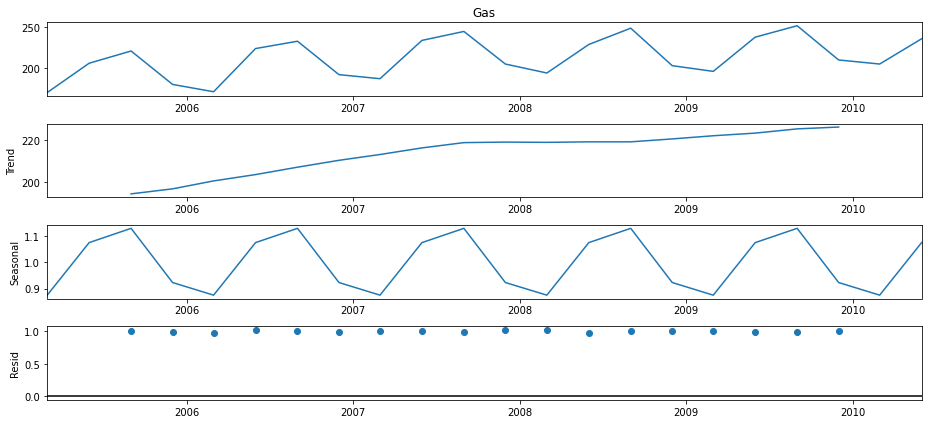

In [ ]:
# Visualization for decomposition on trend, seasonality and residuals for multiplicative model
result = seasonal_decompose(df7.Gas, model='multiplicative', period=4) # 4 selected as period as we have quartely data
result.plot();

I see that residuals are not allocated around zero, they are just on one side, residuals are not random. So I will try additive model as seasonality is not changing with time and trend looks more linear.

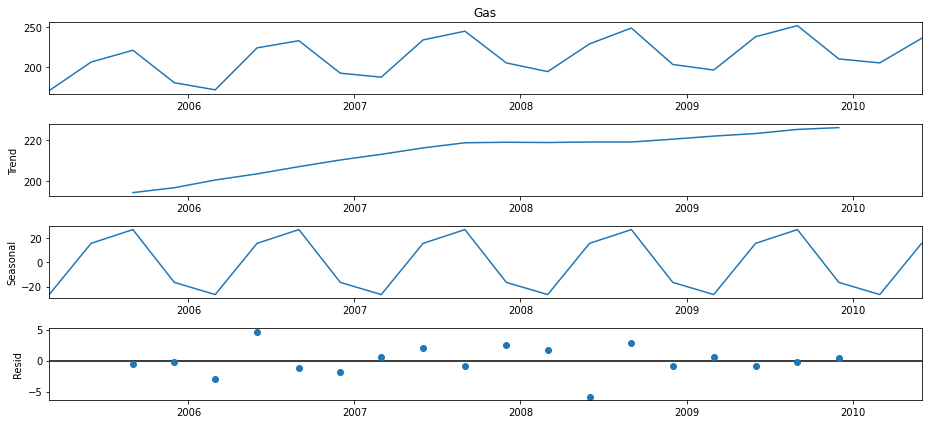

In [ ]:
# Visualization for decomposition on trend, seasonality and residuals for additive model
result_ad = seasonal_decompose(df7.Gas, model='additive', period=4)
result_ad.plot();

Now it looks more correct and residuals are normally distributed around zero. Additive model is better for this data.

##c
Do the results support the graphical interpretation from part a?

Yes, we have confirmation of upward trend and yearly seasonality. But as seasonality doesn't change with time additive model would give the better result.

##d
Compute and plot the seasonally adjusted data.

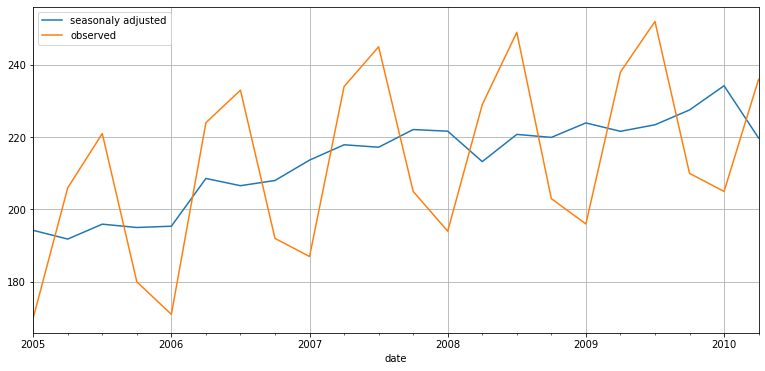

In [ ]:
# Division by sesonal is done as it is written to use multiplicative model in the task
seas_adjusted = result.observed/result.seasonal
seas_adjusted.plot(label='seasonaly adjusted')
result.observed.plot(label='observed')
plt.legend()
plt.grid();

After removing seasonality data become much more smooth.

##e
Change one observation to be an outlier (e.g., add 300 to one observation), and recompute the seasonally adjusted data. What is the effect of the outlier?

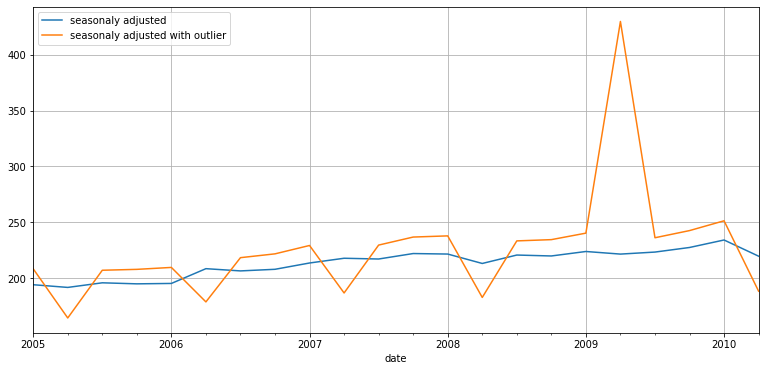

In [ ]:
df7.Gas[-5] = df7.Gas[-5]+300 # adding outlier 
result_out_end = seasonal_decompose(df7.Gas, model='multiplicative', period=4) # decomposition after change
seas_adjusted_out_end = result_out_end.observed/result_out_end.seasonal # new seasonaly adjusted 
seas_adjusted.plot(label='seasonaly adjusted')
seas_adjusted_out_end.plot(label='seasonaly adjusted with outlier')
plt.legend()
plt.grid();

As we can see outlier changes the plot very much. Here we have extreme peak on the outlier place. So to deal with outliers is very important before starting any adjustments.

##f
Does it make any difference if the outlier is near the end rather than in the middle of the time series?

In [ ]:
# recalculating od decomposition
df7.Gas[-5] = df7.Gas[-5]-300 # revert previous changes
df7.Gas[5] = df7.Gas[5]+300 # adding outlier in the beginning
result_out_begin = seasonal_decompose(df7.Gas, model='multiplicative', period=4) # decomposition after change
seas_adjusted_out_begin = result_out_begin.observed/result_out_begin.seasonal # new seasonaly adjusted 

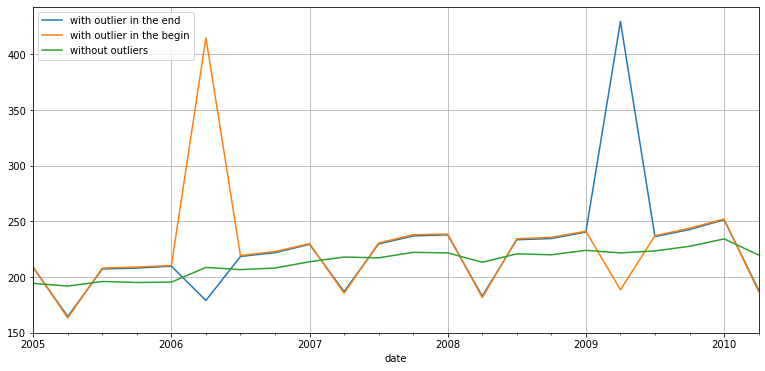

In [ ]:
# Visualization for seasonally adjusted series with different outliers positions
seas_adjusted_out_end.plot(label='with outlier in the end') # plotting with outliers in the end
seas_adjusted_out_begin.plot(label='with outlier in the begin') # plotting with outliers in the begin
seas_adjusted.plot(label='without outliers')
plt.legend()
plt.grid();

From plot we can see that for both positions of outliers changes are almost the same. Just when it is in the end the magnitude of variation is a little bit bigger, I think it is because we have multiplicative model.

# Ex 8
Recall your retail time series data (from Exercise 8 in Section 2.10). Decompose the series using X-11. Does it reveal any outliers, or unusual features that you had not noticed previously?

This exercise is skipped as there is no possible way to implement it in Colab. But I assume that X-11 would detect outliers better and their effect will be much smaller as X-11 is more robust from this point of view. 

# Ex 9
Figures 3.19 and 3.20 show the result of decomposing the number of persons in the civilian labour force in Australia each month from February 1978 to August 1995.

##a
Write about 3–5 sentences describing the results of the decomposition. Pay particular attention to the scales of the graphs in making your interpretation.


1.   After decomposition we can see next components of the series: upward trend, yearly seasonality, remainder with rapid recession in 1991/1992 
2.   Seasonality is yearly and has slightly increasing magnitude with level of series. But generally seasonal changes are not big if to compare to trend and observed scales.
3. On seasonal subplots we can see that for seasonality high peaks are in Dec, Mar, Sep (the highest mean) and lowest values are in Jan and Aug
4. Variation of seasonality is the smallest and for remainder it is a little bit bigger because of recession in 1991/92
5. Trend is changing pretty fast in linear manner.
6. Decomposition gave us good results of separating components as remainder looks close to white noise.




##b
Is the recession of 1991/1992 visible in the estimated components?
* Yes, it is visible very clear in remainder of the first plot and in the subplot for March

# Ex 10
This exercise uses the canadian_gas data (monthly Canadian gas production in billions of cubic metres, January 1960 – February 2005).

##a
Plot the data using autoplot(), gg_subseries() and gg_season() to look at the effect of the changing seasonality over time.

In [ ]:
# Creating corresponding dataframe copy
df10 = df3.copy()
df10.head()

,Volume
Month,
1960-01-01,1.4306
1960-02-01,1.3059
1960-03-01,1.4022
1960-04-01,1.1699
1960-05-01,1.1161


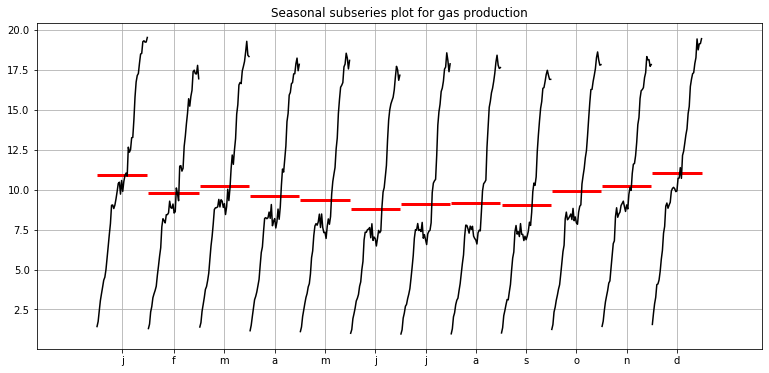

In [ ]:
#Seasonal subseries plot
sm.graphics.tsa.month_plot(df10.Volume)
plt.title('Seasonal subseries plot for gas production')
plt.grid();

From subseries plot we can see that there is yearly seasonality because means for January and December are higher then all others and for June it is the lowest.

Also we can say that gas production is growing for all months with years.

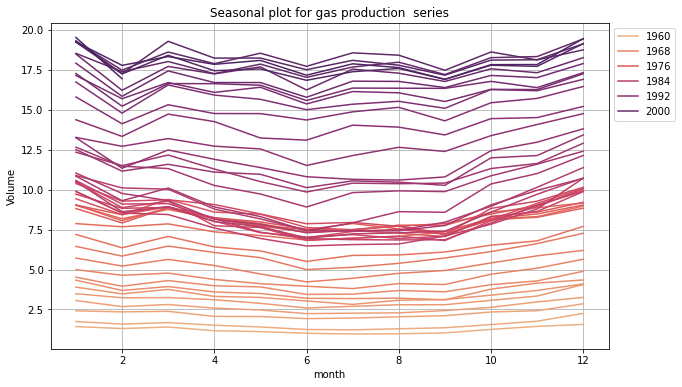

In [ ]:
# Separating year and month and plotting the seasonal graph
df10['year'] = df10.index.year
df10['month'] = df10.index.month
lineplot(df10, 'month', 'Volume', 'year', 'Seasonal plot for gas production ', palette='flare')
plt.legend(bbox_to_anchor=(1,1));

From Seasonal plot we can see that seasonality become more visible in the latest years, there are bigger peaks in Dec-Jan and Mar, and over years volume of gas production increases.

##b
Do an STL decomposition of the data. You will need to choose a seasonal window to allow for the changing shape of the seasonal component.

In [ ]:
# STL decomposition with seasonal window 12 -> as we have monthly data and yearly seasonality
decomp = STL(df10.Volume, period=12).fit()
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

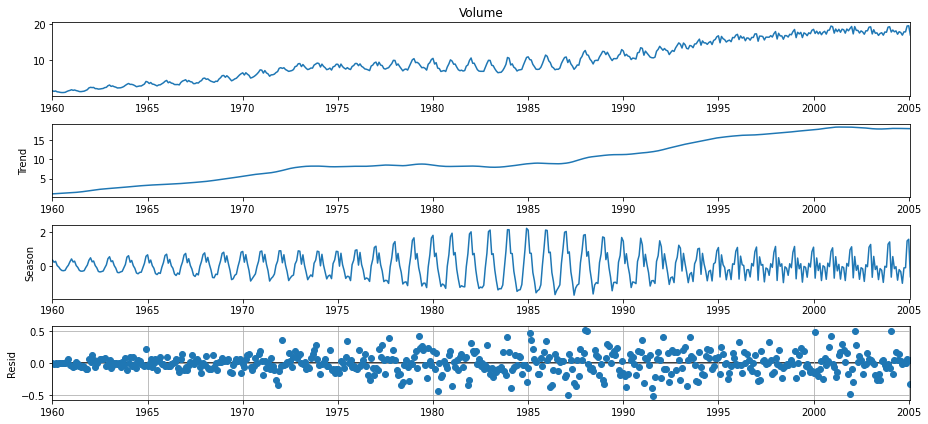

In [ ]:
# Visualization for STL decomposition
decomp.plot()
plt.grid();

From decomposition plot we can see that data has upward trend and changing seasonality.

##c
How does the seasonal shape change over time? Hint: Try plotting the seasonal component using gg_season().

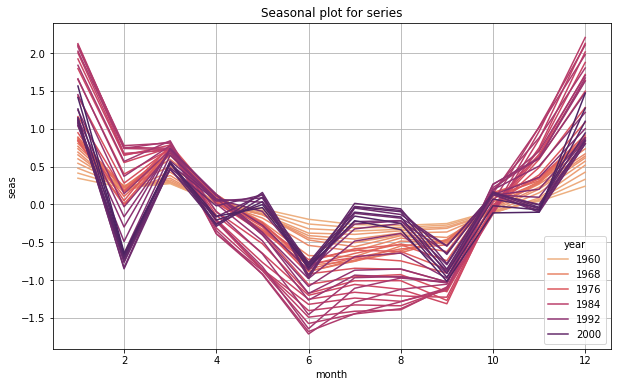

In [ ]:
# Visualization for seasonal component over time
df10['seas'] = seasonal
lineplot(df10, 'month', 'seas', 'year', 'Seasonal plot for', palette='flare')

As we can see for latest years seasonality is very clear with peaks and troughs, for years closer to yellow lines(1976-1960) there is almost no seasonality in data.

##d
Can you produce a plausible seasonally adjusted series?

To have seasonaly adjusted series I extract seasonal component because STL is using additive model

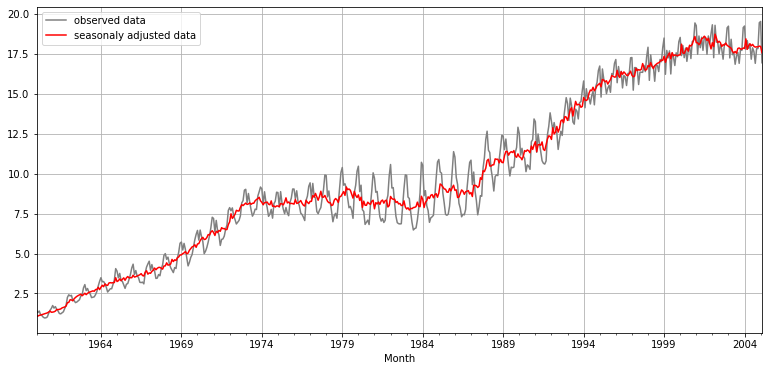

In [ ]:
# Visualization for compering initial data and seasonaly adjusted
seas_adjusted = decomp.observed-seasonal
decomp.observed.plot(label='observed data', c='grey')
seas_adjusted.plot(label='seasonaly adjusted data', c='red')
plt.legend()
plt.grid();

Now the data looks much better and STL decomposition did good job regarding seasonality with different magnitude. Maybe there is some more seasonality pattern because I still see some small regular fluctuations but I'm not sure how to extract it.

#B

**TASK:** Take the US GDP data ( sm.datasets.longley.load_pandas() ) and use the Hodrick-Prescott Filter (Statsmodels function) to extract a trend and cyclic component from each series. You might want to transform these series first. Play around with the parameter values (you can use ipywidgets for an interactive notebook plot) and select the "best" ones. Why did you choose these values? What is the correspondence in cycles between different variables in the data?

## Functions

Some functions for this part of work

In [ ]:
# Helper function for plotting series using axes
def plot2(series, ax, title='Time'):
  ax.plot(series)
  ax.set_title(f'Visualization for {title} series')
  ax.grid()

In [ ]:
# Function for plotting cycle and trend after extraction with Hodrick-Prescott Filter
def plot_cycle_trend(series, title='', lmb=6.25):
  cycle, trend = sm.tsa.filters.hpfilter(series, lmb)
  fig, axes = plt.subplots(1, 2)
  plot2(cycle, axes[0], f'{title} cycle')
  plot2(trend, axes[1], f'{title} trend')
  plt.tight_layout()

In [ ]:
# Function for interactive selection of lambda parameter 
def select_lmd(dataframe, series_name):  
  x = widgets.IntSlider()
  def slide(l):
    plot_cycle_trend(dataframe[f'{series_name}'], series_name, lmb=l)    
  plot = widgets.interactive_output(slide, {'l': x})
  display(plot, x)

## Transformations of the series

In [ ]:
# Reading the data
df = sm.datasets.longley.load_pandas().data
df.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


In [ ]:
# Setting year as an index
df.set_index(pd.to_datetime(df['YEAR'].astype(int), format='%Y'), inplace=True)

First some transformations will be done:


*   TOTEMP, UNEMP were transformed to relative values due to population count, because it make more sense to see % of employed/unemployed then absolute value
*   The same was done to ARMED, but if that had some effect will be checked with plots
*   GNP was transformed per capita and also with GNPDEFL value to make it more correct from inflation point of view






In [ ]:
# Applying described transformations
df['EMP_%']=df.TOTEMP/df.POP*100
df['UNEMP_%']=df.UNEMP/df.POP*100
df['ARM_%']=df.ARMED/df.POP*100
df['GNP_per_cap_adj']=(df.GNP/df.POP)*df.GNPDEFL/100

Now let's check how series have changed after transformation

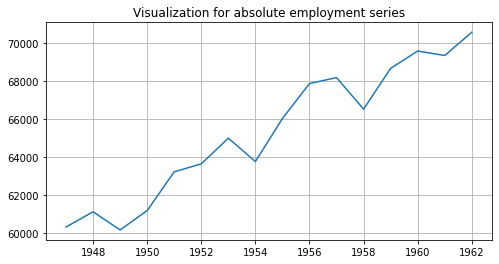

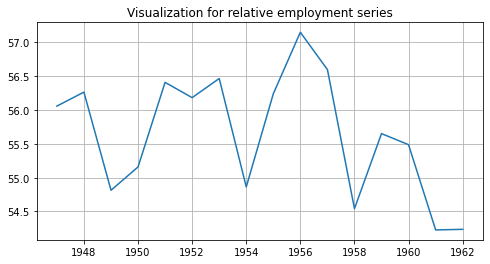

In [ ]:
plot(df.TOTEMP, 'absolute employment')
plot(df['EMP_%'], 'relative employment')

As we can see transformation showed that in reality total employment is not increasing but decreasing after 1956.

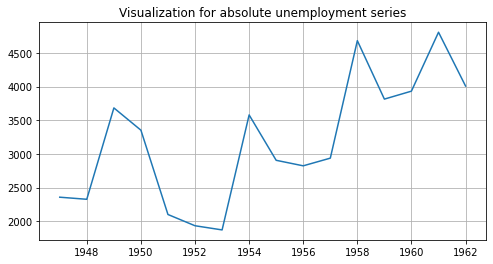

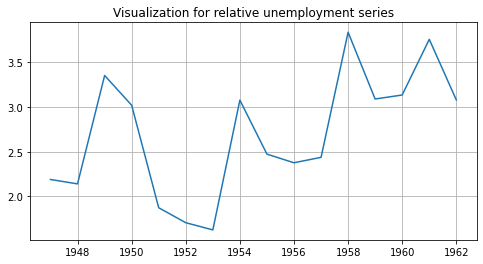

In [ ]:
plot(df.UNEMP, 'absolute unemployment')
plot(df['UNEMP_%'], 'relative unemployment')

For unemployed transformation didn't change anything but still data corresponds to transformed employed percentage.

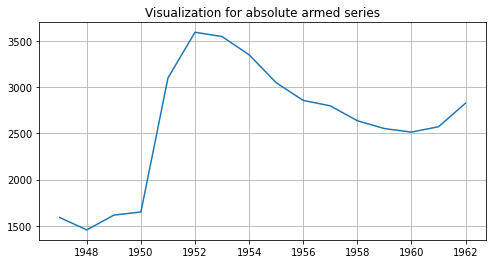

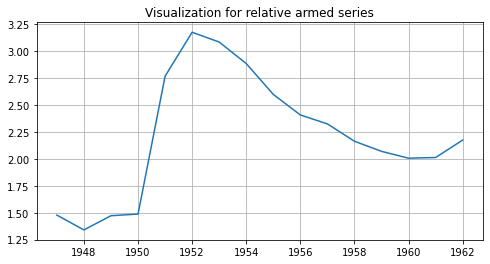

In [ ]:
plot(df.ARMED, 'absolute armed')
plot(df['ARM_%'], 'relative armed')

For Armed forces also transformation just gave other scale but not form of plotting.

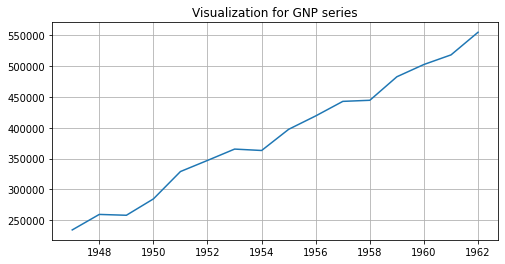

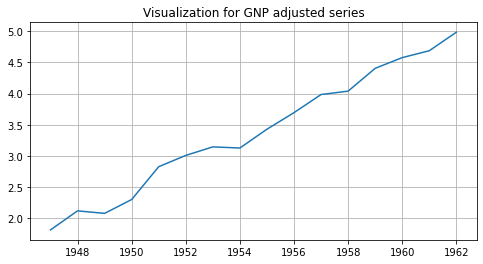

In [ ]:
plot(df.GNP, 'GNP')
plot(df.GNP_per_cap_adj, 'GNP adjusted')

For GNP also upward trend and shape of plot didn't change but it is always better to check GNP per capita and take inflation into account

## Cycles and Trends 

In [ ]:
ser_list = ['EMP_%', 'UNEMP_%', 'GNP_per_cap_adj', 'ARM_%'] # Creating list of series names which will be used later
plt.rcParams["figure.figsize"] = (12, 4) # changing figsize for easier work with interactive plot

In [ ]:
# Visualising all plots with interactive tools to each
for ser_name in ser_list:
  select_lmd(df, ser_name)

Output()

IntSlider(value=0)

Output()

IntSlider(value=0)

Output()

IntSlider(value=0)

Output()

IntSlider(value=0)

* I've played around the lambda values (Hodrick-Prescott smoothing parameter) and it appears that 6.25 value recommended by Ravn and Uhlig for annual data works the best. 
* If I was selecting small values then cycle was too smoth and trend vise versa, if I was selecting bigger values then trend was becoming more smooth and cycle didn't change. That was true for all series. 
* I think with 6.25 value cycles look correct because we can see peaks and troughs within 4-5-6 years, and they are not repeatable in fixed period. Also trends shows correct direction of changes for every series

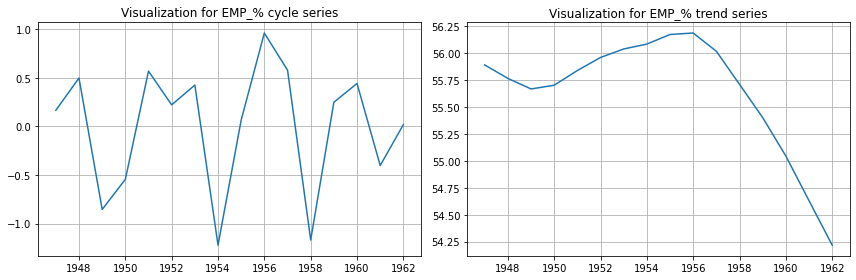

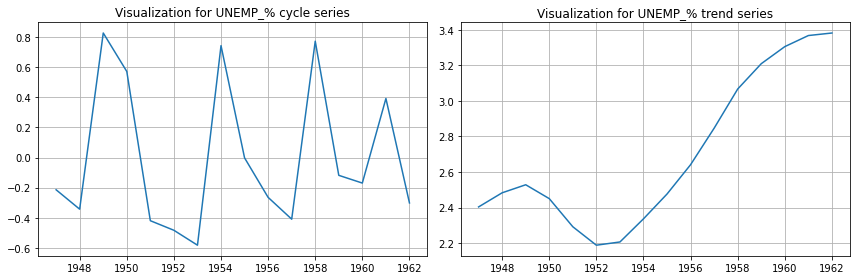

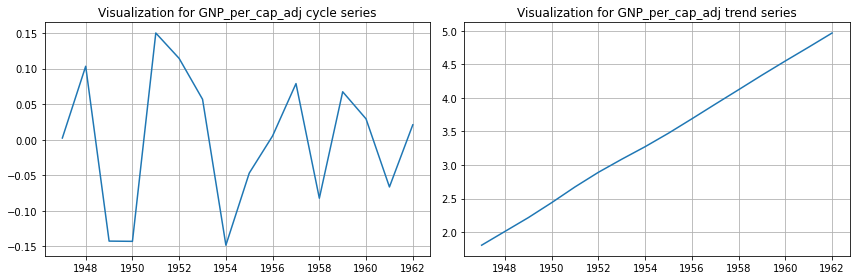

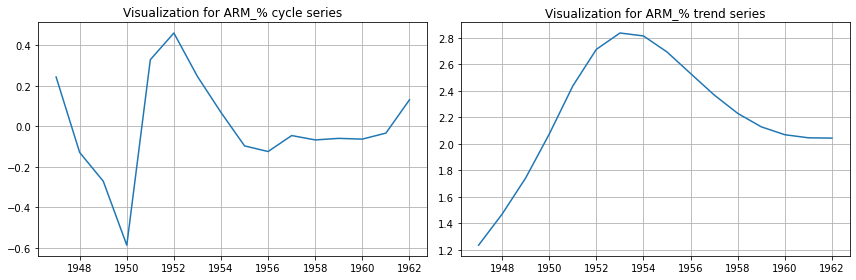

In [ ]:
# Plotting all series trends and cycles with optimal lambda value
for ser_name in ser_list:
  plot_cycle_trend(df[f'{ser_name}'], ser_name, lmb=6.25) 

If to take a look on the cycles of the series we can see correspondence between them:
* Peaks in employed count correspond to troughs in unemployed count and vise versa (1949, 1954, 1958, 1961)
* also there are correspondence with GDP per capita as well, when GDP is low - unemployment increases, employment decreases
* for armed forces there is correspondence with GDP as after it was the biggest(1951 in GDP) next year armed forces become the biggest (1952 in ARM_%). So increasing GDP allows to increase Armed forces.